In [1]:
import pandas as pd
import numpy as np
import requests

from numpy import mean
from numpy import std


import warnings
warnings.filterwarnings("ignore")
#from pmdarima import auto_arima
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from statsmodels.tsa.stattools import adfuller

helloworld


,total_load
timestamp,
1995-07-01 00:00:00,3519
1995-07-01 01:00:00,2978
1995-07-01 02:00:00,2246
1995-07-01 03:00:00,1713
1995-07-01 04:00:00,1468


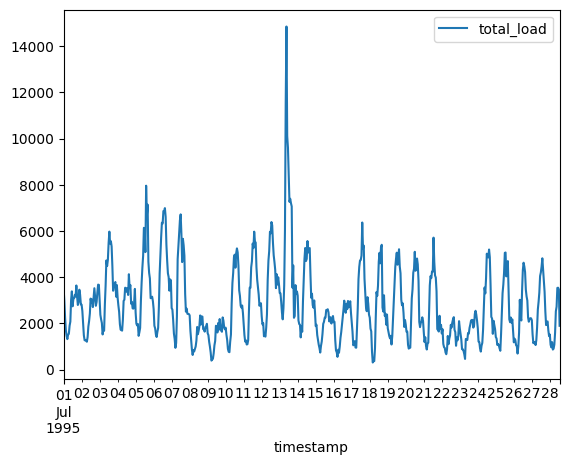

In [2]:

QuerytoolBASE = "http://127.0.0.1:5000/"
response = requests.get(QuerytoolBASE+"databaseservice",json={"start_date": "1995", "databasename": "nasa_full", "end_date": "1995-09-10 23:59:04"})
data_result = response.json()
print("helloworld")

#historical_df = pd.DataFrame(data_result, columns=['timestamp', 'average_load', 'total_load', 'instances'])
historical_df = pd.DataFrame(data_result, columns=['timestamp','requests'])

historical_df['timestamp'] = pd.to_datetime(historical_df['timestamp'],format='%a, %d %b %Y %H:%M:%S GMT') 
historical_df['total_load'] = historical_df['requests'].astype(int)
#historical_df = historical_df[historical_df['total_load'] < 9000]
historical_df = historical_df.set_index("timestamp")
historical_df = historical_df.sort_index()
#historical_df =historical_df.drop(columns=[ 'average_load', 'instances'])
historical_df =historical_df.drop(columns=['requests'])
historical_df = historical_df.resample('H').sum()
#historical_df = historical_df[historical_df['total_load'] < 9000]
historical_df.plot()
historical_df.head()

,total_load
timestamp,
1995-07-01 00:00:00,3519
1995-07-01 01:00:00,2978
1995-07-01 02:00:00,2246
1995-07-01 03:00:00,1713
1995-07-01 04:00:00,1468


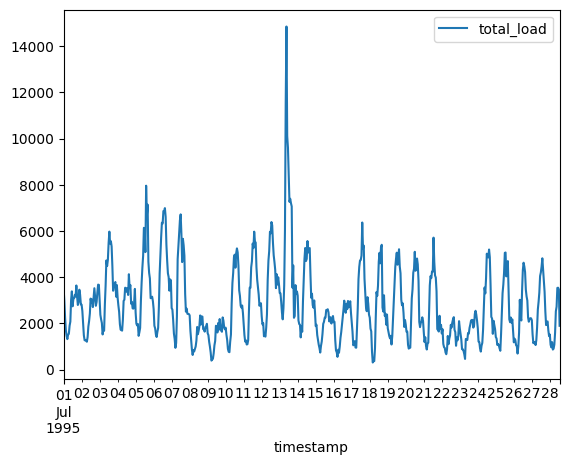

In [3]:
historical_df.plot()
historical_df.head()


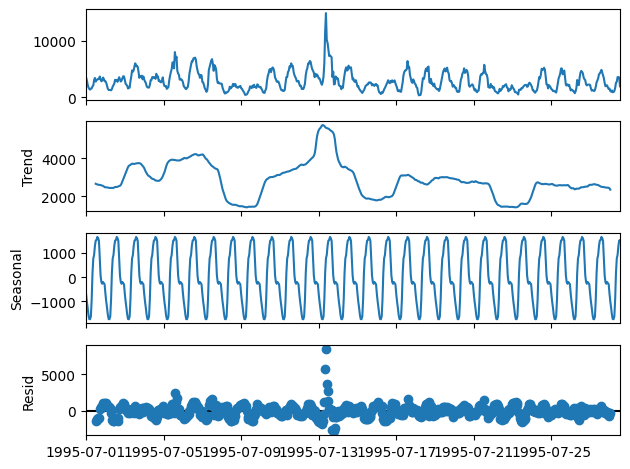

,total_load
timestamp,
1995-07-01 00:00:00,3519
1995-07-01 01:00:00,2978
1995-07-01 02:00:00,2246
1995-07-01 03:00:00,1713
1995-07-01 04:00:00,1468


In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

historical_df.head()
result = seasonal_decompose(historical_df, model='additive')
result.plot()
pyplot.show()
historical_df.head()

In [5]:
historical_df = historical_df[historical_df['total_load'] < 8000]
historical_df.head()

,total_load
timestamp,
1995-07-01 00:00:00,3519
1995-07-01 01:00:00,2978
1995-07-01 02:00:00,2246
1995-07-01 03:00:00,1713
1995-07-01 04:00:00,1468


In [6]:
len(historical_df)

657

In [7]:
train = historical_df.iloc[:550]
test = historical_df.iloc[550:]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [9]:
historical_df.head(),historical_df.tail()

(                     total_load
 timestamp                      
 1995-07-01 00:00:00        3519
 1995-07-01 01:00:00        2978
 1995-07-01 02:00:00        2246
 1995-07-01 03:00:00        1713
 1995-07-01 04:00:00        1468,
                      total_load
 timestamp                      
 1995-07-28 09:00:00        2725
 1995-07-28 10:00:00        3539
 1995-07-28 11:00:00        3548
 1995-07-28 12:00:00        3475
 1995-07-28 13:00:00        1900)

In [10]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
scaled_train[:10]

array([[0.4192368 ],
       [0.34853633],
       [0.25287507],
       [0.18322007],
       [0.1512023 ],
       [0.13225301],
       [0.15773654],
       [0.16204914],
       [0.20831155],
       [0.23144276]])

In [20]:

#from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

2024-03-15 11:14:43.240529: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
# univariate one step problem with mlp
import keras
import tensorflow as tf
from numpy import array
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

2024-03-20 15:48:39.138765: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.4192368  0.34853633 0.25287507]
Predict this y: 
 [[0.18322007]]


In [13]:
X.shape

(1, 3, 1)

In [14]:
# samma fast med 1/3
n_input = 10
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [15]:

from keras.optimizers import Adam 

model = Sequential()
#model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(LSTM(64, return_sequences= True, activation='tanh', input_shape=(n_input, n_features))) # provar tanh model för att minska vanishing gradient problem
#model.add(LSTM(64, return_sequences=True))
model.add(Dense(1))
#learning_rate = 0.0001
#optimizer = Adam(learning_rate=0.00001)  # Define optimizer with specified learning rate
model.compile(optimizer="adam", loss='mse')


# define model
#model1 = Sequential()
#model1.add(InputLayer((5, 1)))
#model1.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
#model1.add(Dense(1, activation='relu'))
#optimizer = Adam(learning_rate=0.0001)  # Define optimizer with specified learning rate
#model1.compile(optimizer=optimizer, loss='mse')

#model1.add(InputLayer((5, 1))) 
#model1.add(LSTM(100)) # number of neurons
#model1.add(Dense(1, 'relu')) # 8 relus för att testa
#model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.000001), metrics=[RootMeanSquaredError()])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10, 1)          │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.fit(generator,epochs=30)

Epoch 1/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0345
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0309
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0284
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0302
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0299
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0288
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0283
Epoch 8/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0242
Epoch 9/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0282
Epoch 10/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0266
Epoch 11/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0251
Epoch 12/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0305
Epoch 13/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0257
Epoch 14/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0252
Epoch 15/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - lo

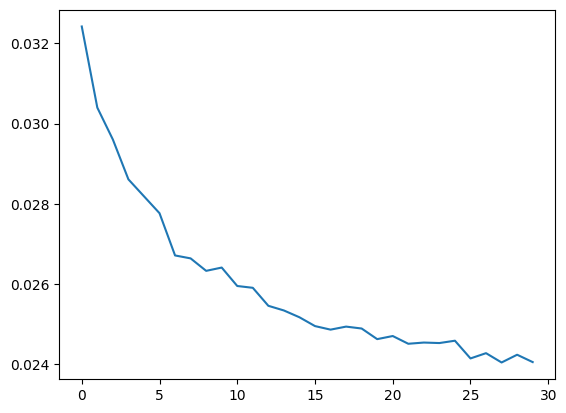

In [19]:
import matplotlib.pyplot as plt
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [20]:
last_train_batch = scaled_train[-10:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


array([[[0.32459012],
        [0.28757864],
        [0.30403525],
        [0.3430886 ],
        [0.31662846],
        [0.24674122],
        [0.1945853 ],
        [0.14524032],
        [0.08021004],
        [0.1257595 ]]], dtype=float32)

In [21]:
scaled_test[0]

array([0.07919498])

In [22]:

test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 4 dimension(s)

In [ ]:
test_predictions

[array([[0.32158852],
        [0.3301974 ],
        [0.3490566 ],
        [0.37385976],
        [0.3627326 ],
        [0.25380754],
        [0.20552129],
        [0.15890029],
        [0.08330795],
        [0.06468651]], dtype=float32)]

In [ ]:
test.head()


,total_load
timestamp,
1995-07-24 03:00:00,917
1995-07-24 04:00:00,783
1995-07-24 05:00:00,1041
1995-07-24 06:00:00,1162
1995-07-24 07:00:00,1725


In [ ]:
test = test.drop(columns=['predictions'])


KeyError: "['predictions'] not found in axis"

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

ValueError: Found array with dim 3. None expected <= 2.

In [ ]:
test['predictions'] = true_predictions

In [ ]:
# Plot training data
plt.figure(figsize=(14, 5))

# Plot training data
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
plt.plot(train.index, train['total_load'], label='Training Data')
plt.plot(test.index, test['total_load'], label='Test Data', linestyle='--')
plt.title('Training Data and Test Data')
plt.xlabel('Date')
plt.ylabel('total_load')
plt.legend()
plt.grid(True)

# Plot test predictions
plt.subplot(1, 2, 2)
plt.plot(test.index, test['total_load'], label='Actual total_load')
plt.plot(test.index, test['predictions'], label='Predicted total_load (2 layers, tanh, 64 neurons, n=10)', linestyle='--')
plt.title('Test Data and predictions')
plt.xlabel('Date')
plt.ylabel('total_load')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

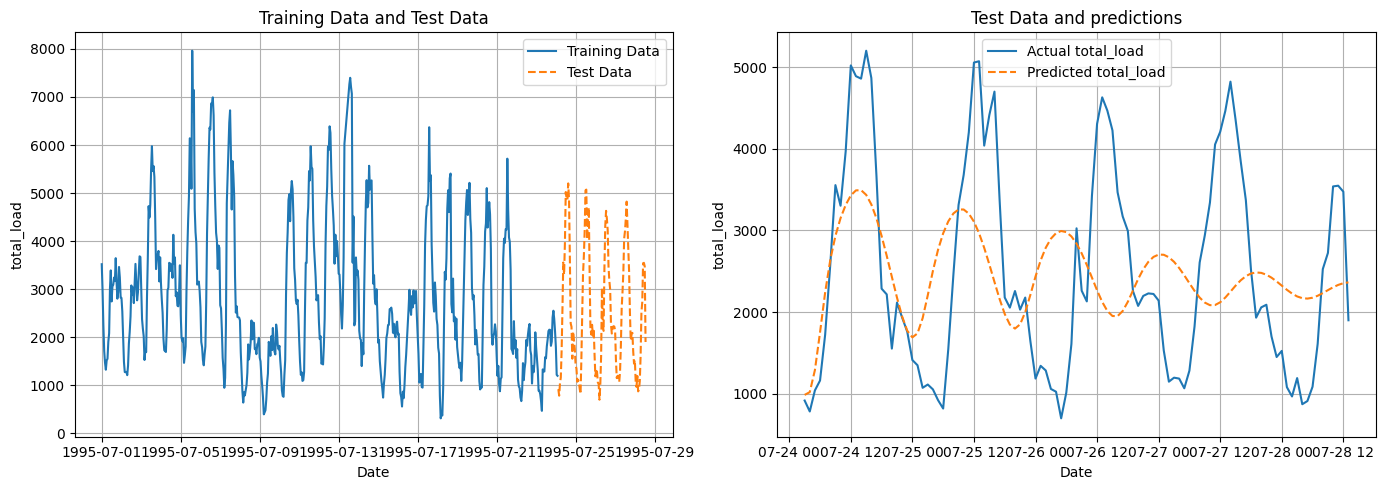

In [ ]:
# Plot training data
plt.figure(figsize=(14, 5))

# Plot training data
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
plt.plot(train.index, train['total_load'], label='Training Data')
plt.plot(test.index, test['total_load'], label='Test Data', linestyle='--')
plt.title('Training Data and Test Data')
plt.xlabel('Date')
plt.ylabel('total_load')
plt.legend()
plt.grid(True)

# Plot test predictions
plt.subplot(1, 2, 2)
plt.plot(test.index, test['total_load'], label='Actual total_load')
plt.plot(test.index, test['predictions'], label='Predicted total_load', linestyle='--')
plt.title('Test Data and predictions')
plt.xlabel('Date')
plt.ylabel('total_load')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

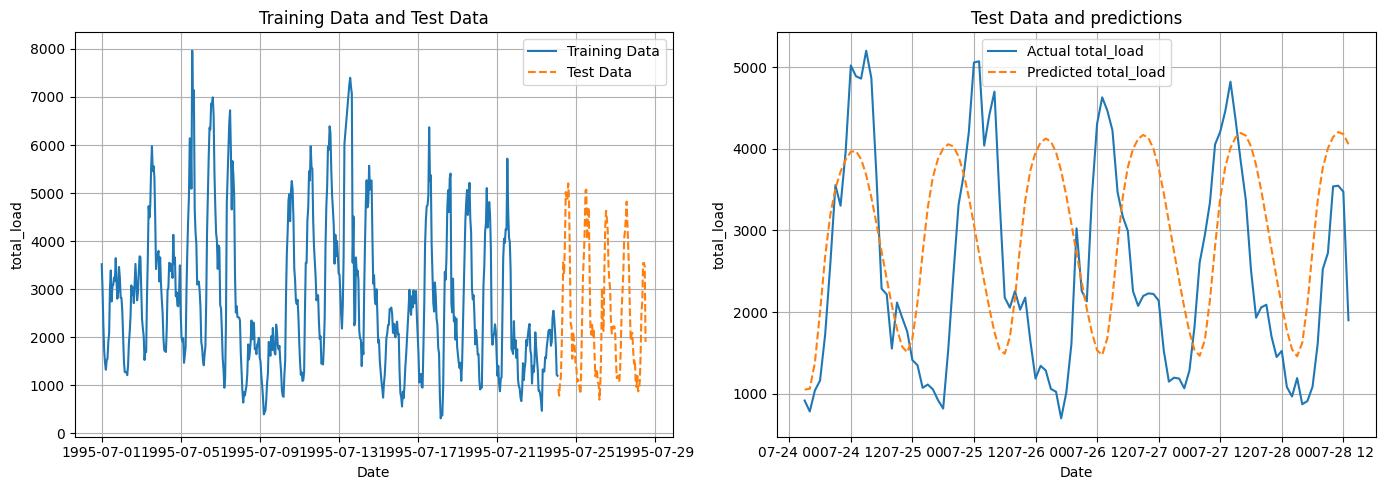

In [241]:
# Plot training data
plt.figure(figsize=(14, 5))

# Plot training data
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
plt.plot(train.index, train['total_load'], label='Training Data')
plt.plot(test.index, test['total_load'], label='Test Data', linestyle='--')
plt.title('Training Data and Test Data')
plt.xlabel('Date')
plt.ylabel('total_load')
plt.legend()
plt.grid(True)

# Plot test predictions
plt.subplot(1, 2, 2)
plt.plot(test.index, test['total_load'], label='Actual total_load')
plt.plot(test.index, test['predictions'], label='Predicted total_load', linestyle='--')
plt.title('Test Data and predictions')
plt.xlabel('Date')
plt.ylabel('total_load')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [189]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['predictions'],test['total_load']))
print(rmse)
test.head()

1280.390543024889


,total_load,predictions
timestamp,,
1995-07-24 03:00:00,917,1210.323165
1995-07-24 04:00:00,783,1449.046117
1995-07-24 05:00:00,1041,1955.291783
1995-07-24 06:00:00,1162,2608.506111
1995-07-24 07:00:00,1725,3082.843046


In [173]:
QuerytoolBASE = "http://127.0.0.1:5000/"
response = requests.get(QuerytoolBASE+"databaseservice",json={"start_date": "1998-05-01 01:00:00", "databasename": "allworldcup98", "end_date": "1998-05-27 00:00:00"})
data_result = response.json()
print("helloworld")

#historical_df = pd.DataFrame(data_result, columns=['timestamp', 'average_load', 'total_load', 'instances'])
historical_df = pd.DataFrame(data_result, columns=['timestamp','requests'])

historical_df['timestamp'] = pd.to_datetime(historical_df['timestamp'],format='%a, %d %b %Y %H:%M:%S GMT') 
historical_df['total_load'] = historical_df['requests'].astype(int)
#historical_df = historical_df[historical_df['total_load'] < 9000]
historical_df = historical_df.set_index("timestamp")
historical_df = historical_df.sort_index()
#historical_df =historical_df.drop(columns=[ 'average_load', 'instances'])
historical_df =historical_df.drop(columns=['requests'])
historical_df = historical_df.resample('H').sum()
#historical_df = historical_df[historical_df['total_load'] < 9000]
historical_df.plot()
historical_df.head()

helloworld


KeyError: "['average_load', 'instances'] not found in axis"

,total_load
timestamp,
1998-05-01 01:00:00,46813
1998-05-01 02:00:00,39482
1998-05-01 03:00:00,36221
1998-05-01 04:00:00,36270
1998-05-01 05:00:00,39474


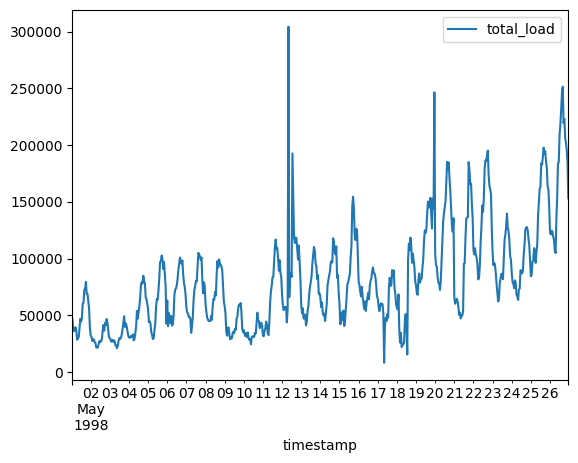

In [202]:
#historical_df =historical_df.drop(columns=['requests'])
historical_df = historical_df.resample('H').sum()
#historical_df = historical_df[historical_df['total_load'] < 9000]
historical_df.plot()
historical_df.head()

<Axes: xlabel='timestamp'>

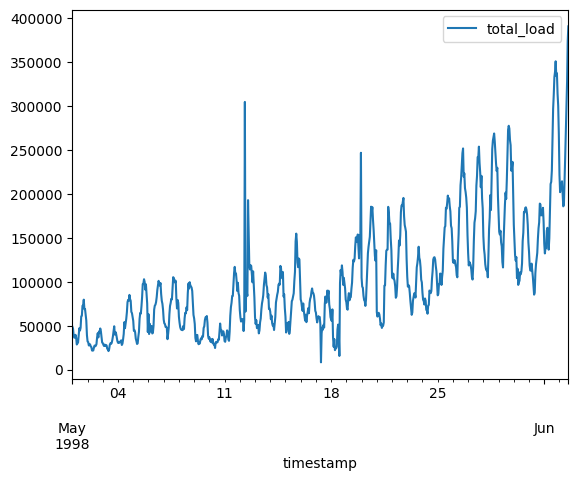

In [ ]:

#historical_df_filtered.plot()

# Display the first few rows of the filtered DataFrame
#historical_df_filtered.head()


historical_df.head()
historical_df.plot()

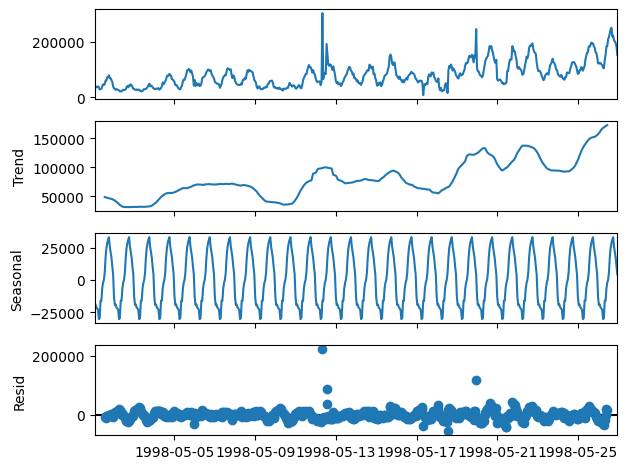

In [203]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

#historical_df.head()
result = seasonal_decompose(historical_df, model='additive')
result.plot()
pyplot.show()
#historical_df.head()

In [204]:
len(historical_df)

623

In [205]:
train = historical_df.iloc[:560]
test = historical_df.iloc[560:]

In [206]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [207]:
historical_df.head(), historical_df.tail()

(                     total_load
 timestamp                      
 1998-05-01 01:00:00       46813
 1998-05-01 02:00:00       39482
 1998-05-01 03:00:00       36221
 1998-05-01 04:00:00       36270
 1998-05-01 05:00:00       39474,
                      total_load
 timestamp                      
 1998-05-26 19:00:00      206372
 1998-05-26 20:00:00      201945
 1998-05-26 21:00:00      195608
 1998-05-26 22:00:00      184086
 1998-05-26 23:00:00      153090)

In [208]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
scaled_train[:10]

array([[0.1304502 ],
       [0.1056966 ],
       [0.09468562],
       [0.09485108],
       [0.10566959],
       [0.09486796],
       [0.06843284],
       [0.07285276],
       [0.07594231],
       [0.10252601]])

In [209]:
# univariate one step problem with mlp
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator



n_input = 10
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [210]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.1304502  0.1056966  0.09468562 0.09485108 0.10566959 0.09486796
 0.06843284 0.07285276 0.07594231 0.10252601]
Predict this y: 
 [[0.13100395]]


In [211]:
X.shape, y.shape

((1, 10, 1), (1, 1))

In [212]:
# samma fast med 1/3
n_input = 10
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [213]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [214]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

In [215]:
# define model
model = Sequential()
model.add(LSTM(64, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

In [216]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [217]:
model.fit(generator,epochs=30)

Epoch 1/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0157
Epoch 2/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0036
Epoch 3/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0038
Epoch 4/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0057
Epoch 5/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0056
Epoch 6/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0052
Epoch 7/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0027
Epoch 8/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0034
Epoch 9/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0028
Epoch 10/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0019
Epoch 11/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 0.0052
Epoch 12/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0029
Epoch 13/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0037
Epoch 14/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0028
Epoch 15/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 4s

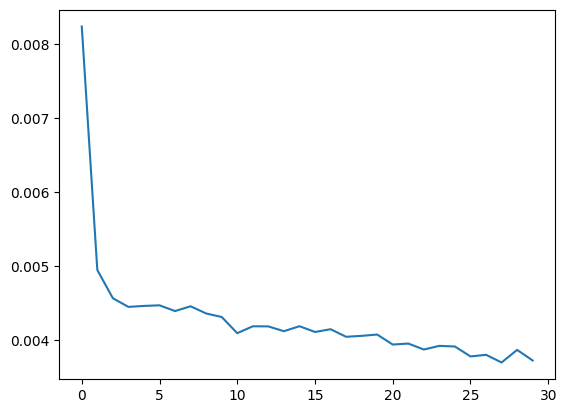

In [218]:
import matplotlib.pyplot as plt
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [219]:
test = test.drop(columns=['Predictions'])

KeyError: "['Predictions'] not found in axis"

In [ ]:

last_train_batch = scaled_train[-10:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, 10, 1))

In [ ]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


array([[0.19753245]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.21791335])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

In [156]:

test_predictions

[array([0.31481278], dtype=float32),
 array([0.3348496], dtype=float32),
 array([0.36137906], dtype=float32),
 array([0.39419627], dtype=float32),
 array([0.43004516], dtype=float32),
 array([0.46484816], dtype=float32),
 array([0.498178], dtype=float32),
 array([0.53312016], dtype=float32),
 array([0.56949985], dtype=float32),
 array([0.60221946], dtype=float32),
 array([0.6298335], dtype=float32),
 array([0.6527563], dtype=float32),
 array([0.6696364], dtype=float32),
 array([0.6805915], dtype=float32),
 array([0.6843583], dtype=float32),
 array([0.6831558], dtype=float32),
 array([0.67809874], dtype=float32),
 array([0.66983986], dtype=float32),
 array([0.6594027], dtype=float32),
 array([0.6476808], dtype=float32),
 array([0.6355143], dtype=float32),
 array([0.6233296], dtype=float32),
 array([0.6115494], dtype=float32),
 array([0.60029006], dtype=float32),
 array([0.5896289], dtype=float32),
 array([0.5798838], dtype=float32),
 array([0.5712937], dtype=float32),
 array([0.56373745

In [197]:
test.head()

,total_load
timestamp,
1998-05-24 09:00:00,72716
1998-05-24 10:00:00,73431
1998-05-24 11:00:00,89843
1998-05-24 12:00:00,88848
1998-05-24 13:00:00,86847


In [81]:
test = test.drop(columns=['Predictions'])

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions


'allworldcup relu 3 layers 1 dense 100 neurons optimizer=adam'

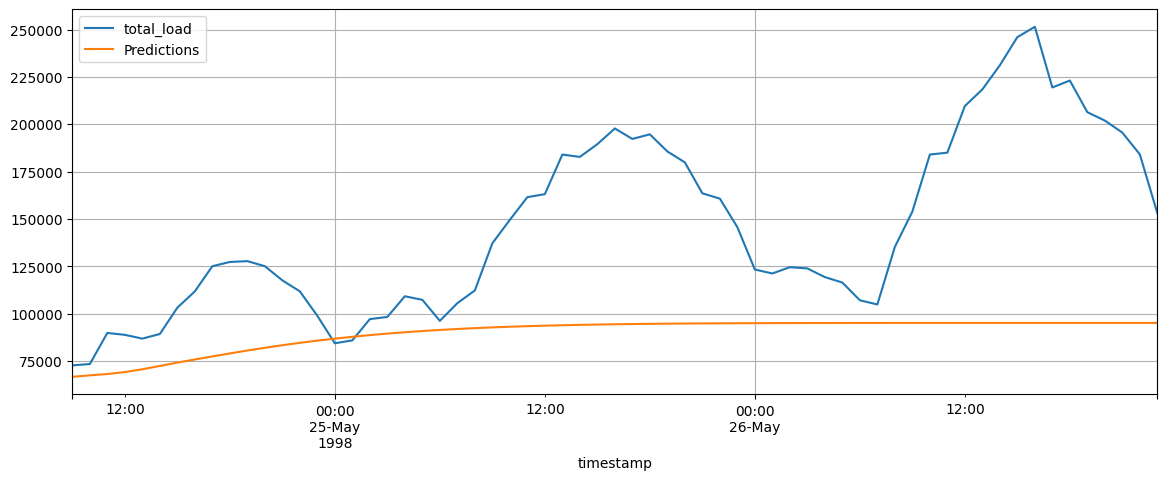

In [ ]:
test.plot(figsize=(14,5), grid=True, )
"allworldcup relu 2 layers 1 dense 64 neurons optimizer=adam, learning rate 0.001"

<Axes: xlabel='timestamp'>

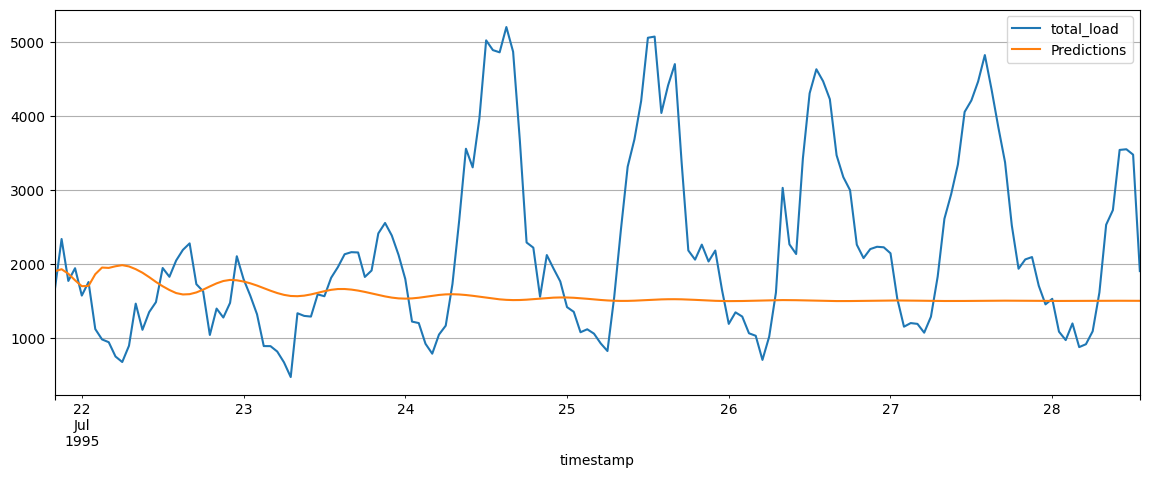

In [99]:
test.plot(figsize=(14,5), grid=True, )
#relu, 100 neuroner, 2 layers, nasa_full dataset

<Axes: xlabel='timestamp'>

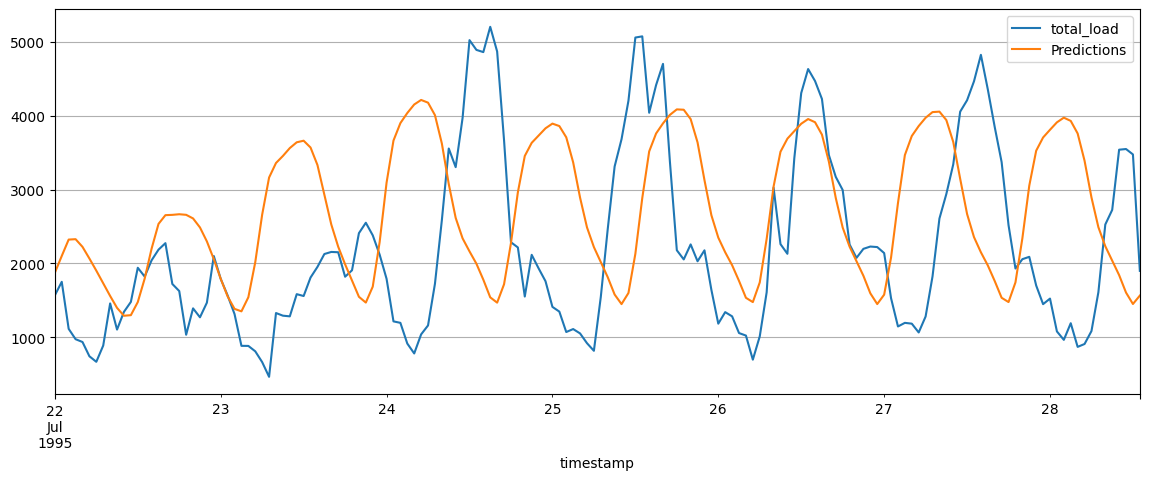

In [127]:
test.plot(figsize=(14,5), grid=True, )
#nasa_full ( inga outliers)

In [126]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['total_load'],test['Predictions']))
print(rmse)

1633.6373923385013


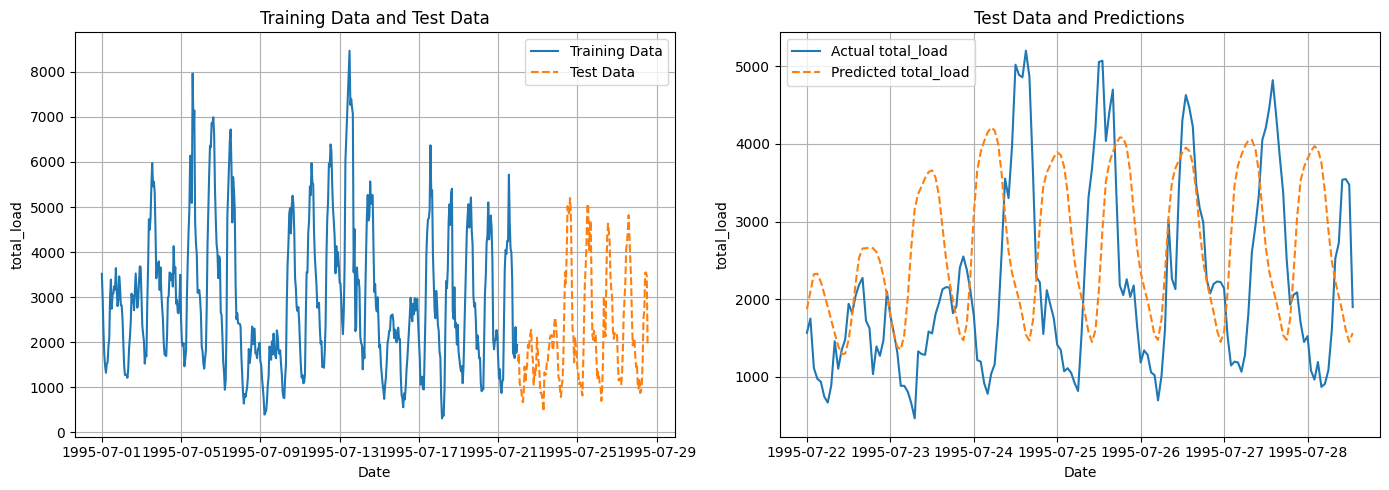

In [136]:
# Plot training data
plt.figure(figsize=(14, 5))

# Plot training data
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
plt.plot(train.index, train['total_load'], label='Training Data')
plt.plot(test.index, test['total_load'], label='Test Data', linestyle='--')
plt.title('Training Data and Test Data')
plt.xlabel('Date')
plt.ylabel('total_load')
plt.legend()
plt.grid(True)

# Plot test predictions
plt.subplot(1, 2, 2)
plt.plot(test.index, test['total_load'], label='Actual total_load')
plt.plot(test.index, test['Predictions'], label='Predicted total_load', linestyle='--')
plt.title('Test Data and Predictions')
plt.xlabel('Date')
plt.ylabel('total_load')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()



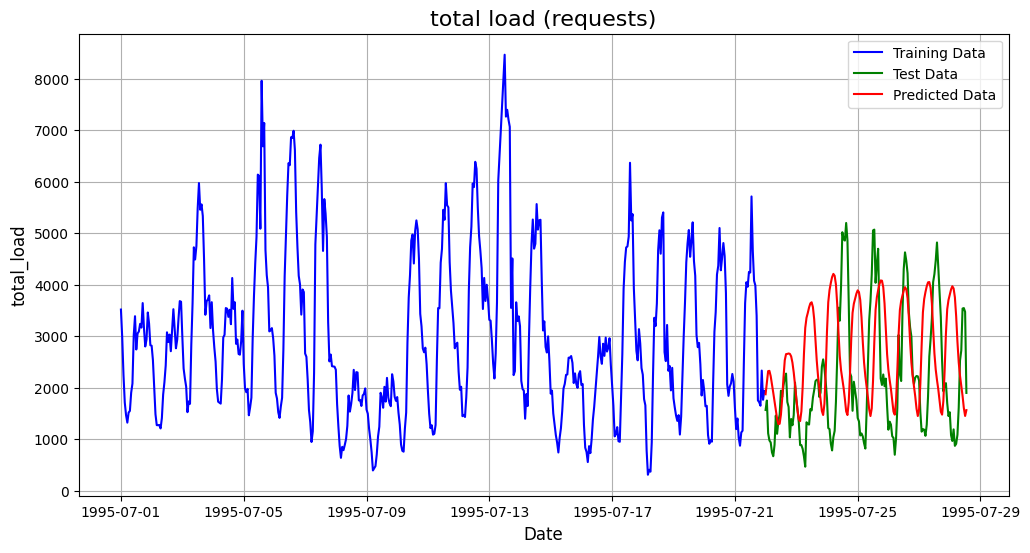

In [137]:
import matplotlib.pyplot as plt

# Plot the training data
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(train.index, train['total_load'], label='Training Data', color='blue')

# Plot the test data
plt.plot(test.index, test['total_load'], label='Test Data', color='green')

# Plot the predicted data
plt.plot(test.index, test['Predictions'], label='Predicted Data', color='red')

# Customize the plot
plt.title('total load (requests)', fontsize=16)  # Add a title
plt.xlabel('Date', fontsize=12)  # Add a label for the x-axis
plt.ylabel('total_load', fontsize=12)  # Add a label for the y-axis
plt.grid(True)  # Add a grid

# Add legend
plt.legend()

# Show plot
plt.show()


In [204]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np  

helloworld


,total_load
timestamp,
1995-07-01 00:00:00,3519
1995-07-01 01:00:00,2978
1995-07-01 02:00:00,2246
1995-07-01 03:00:00,1713
1995-07-01 04:00:00,1468


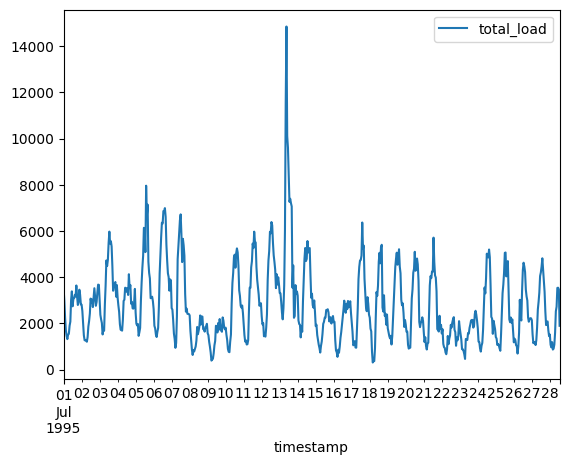

In [205]:
QuerytoolBASE = "http://127.0.0.1:5000/"
response = requests.get(QuerytoolBASE+"databaseservice",json={"start_date": "1995", "databasename": "nasa_full"})
data_result = response.json()
print("helloworld")

#historical_df = pd.DataFrame(data_result, columns=['timestamp', 'average_load', 'total_load', 'instances'])
historical_df = pd.DataFrame(data_result, columns=['timestamp','requests'])

historical_df['timestamp'] = pd.to_datetime(historical_df['timestamp'],format='%a, %d %b %Y %H:%M:%S GMT') 
historical_df['total_load'] = historical_df['requests'].astype(int)
historical_df = historical_df.set_index("timestamp")
historical_df = historical_df.sort_index()
#historical_df =historical_df.drop(columns=[ 'average_load', 'instances'])
historical_df =historical_df.drop(columns=['requests'])
historical_df = historical_df.resample('H').sum()
historical_df.plot()
historical_df.head()

<Axes: xlabel='timestamp'>

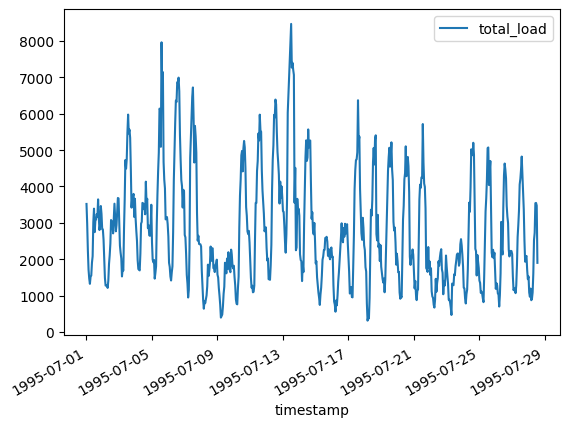

In [206]:
historical_df = historical_df[historical_df['total_load'] < 9000]
historical_df.plot()

In [207]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [208]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(historical_df, WINDOW_SIZE)
X1.shape, y1.shape

((653, 5, 1, 1), (653, 1))

In [210]:
X_train1, y_train1 = X1[:460], y1[:460]
X_val1, y_val1 = X1[430:520], y1[430:520]
X_test1, y_test1 = X1[520:], y1[520:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((460, 5, 1, 1), (460, 1), (90, 5, 1, 1), (90, 1), (133, 5, 1, 1), (133, 1))

In [245]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1))) 
model1.add(LSTM(100)) # number of neurons
model1.add(Dense(1, 'relu')) # 8 relus för att testa
#model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                  │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [247]:
filepath = 'model1/model1'
cp1 = ModelCheckpoint(filepath + '.keras', save_best_only=True) # Save the best model in Keras format
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.000001), metrics=[RootMeanSquaredError()])

In [249]:
model1.fit(generator,epochs=40)

Epoch 1/40


AttributeError: 'NoneType' object has no attribute 'items'

In [233]:
import numpy as np

# Convert y_train1 and y_val1 to float32
y_train1 = np.array(y_train1, dtype=np.float32)
y_val1 = np.array(y_val1, dtype=np.float32)

# Then fit the model
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=20, callbacks=[cp1])


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 10941491.0000 - root_mean_squared_error: 3304.0078 - val_loss: 7915446.5000 - val_root_mean_squared_error: 2877.8743
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11368031.0000 - root_mean_squared_error: 3366.2209 - val_loss: 7915446.5000 - val_root_mean_squared_error: 2877.8743
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11384380.0000 - root_mean_squared_error: 3370.9077 - val_loss: 7915446.5000 - val_root_mean_squared_error: 2877.8743
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11933123.0000 - root_mean_squared_error: 3448.8398 - val_loss: 7915446.5000 - val_root_mean_squared_error: 2877.8743
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12258003.0000 - root_mean_squared_error: 3501.3335 - val_loss: 7915446.5000 - val_root_mean_squared_error: 2877.8743
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10706674.0000 - root_mean_squared_error: 3266.3413 - val_loss: 

In [235]:
from keras.models import load_model
model1 = load_model('model1/model1.keras')

In [240]:
train_predictions = model1.predict(X_train1).flatten()
y_train1_flat = y_train1.flatten()

train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals': y_train1_flat})


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


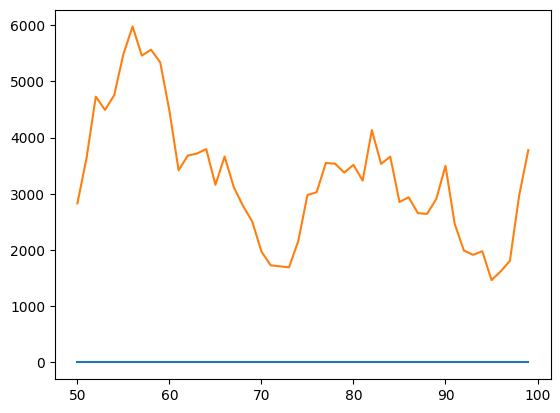

In [241]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [243]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


ValueError: Per-column arrays must each be 1-dimensional

In [244]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

NameError: name 'val_results' is not defined